Using tensorflow, construct and train a CNN for classification of MNIST dataset. Be able to explain details of your implementation and justify the decisions made.

In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras import Sequential
from keras import layers
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy , MeanSquaredError
from keras.utils import to_categorical
import tensorflow as tf 
import numpy as np 



In [2]:
(train_images, train_labels), (test_images, test_labels)  = mnist.load_data()

print('MNIST Dataset Shape:')
print('X_train: ' + str(train_images.shape))
print('Y_train: ' + str(train_labels.shape))
print('X_test:  '  + str(test_images.shape))
print('Y_test:  '  + str(test_labels.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


https://poloclub.github.io/cnn-explainer/ 
There is really nice interactive website that's helpful in understanding CNN architecture so I would try to implement it.

https://www.learnpytorch.io/

In [3]:
# Peforming reshaping operation
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)


In [4]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
# # reshaping images adding dimension and converting grayscale to rgb 
# train_images = train_images[...,tf.newaxis] # SHape: (N,28,28,1)
# test_images = test_images[...,tf.newaxis]
# # Convert grayscale images to RGB (from (224, 224, 1) to (224, 224, 3))

# # Resize images to (224, 224)
# train_images = tf.image.resize(train_images, (224, 224))  # Shape: (N, 224, 224, 1)
# test_images = tf.image.resize(test_images, (224, 224))    # Shape: (N, 224, 224, 1)

# train_images = tf.image.grayscale_to_rgb(train_images)  # Shape: (N, 224, 224, 3)
# test_images = tf.image.grayscale_to_rgb(test_images)    # Shape: (N, 224, 224, 3)

# for now omit that 

In [6]:
print('MNIST Dataset Shape after reshapign:')
print('X_train: ' + str(train_images.shape))
print('Y_train: ' + str(train_labels.shape))
print('X_test:  '  + str(test_images.shape))
print('Y_test:  '  + str(test_labels.shape))

MNIST Dataset Shape after reshapign:
X_train: (60000, 28, 28, 1)
Y_train: (60000,)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000,)


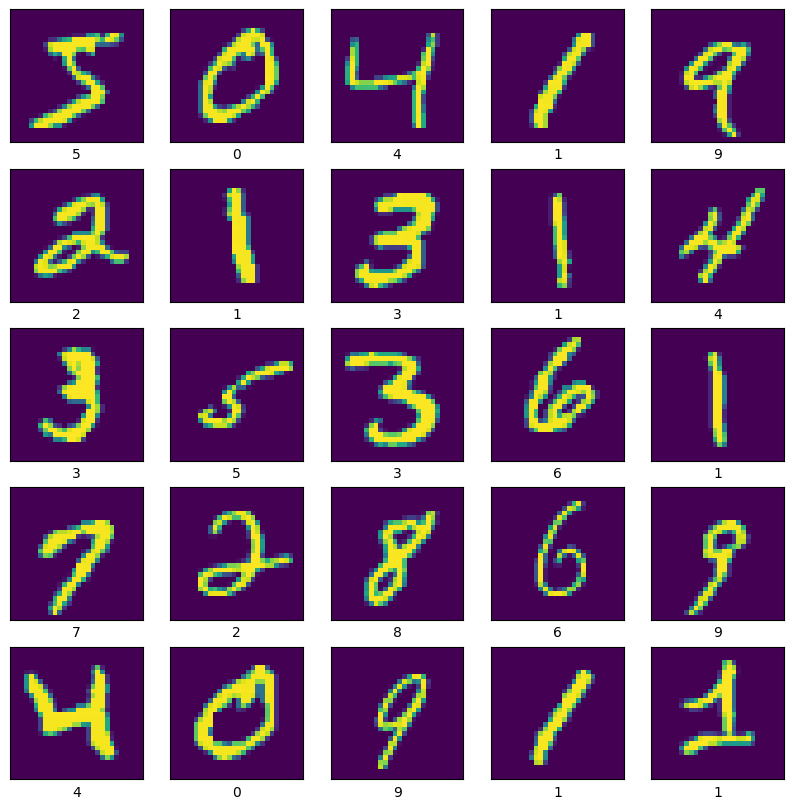

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # which is why you need the extra index
    plt.xlabel(train_labels[i])
plt.show()

In [8]:
train_labels_oh , test_labels_oh = to_categorical(train_labels, num_classes=10), to_categorical(test_labels,num_classes = 10) # 1 hot encoding 

In [9]:
train_images.shape

(60000, 28, 28, 1)

In [10]:

# building Tiny VGG network
NUM_CLASSES = 10 
FILTERS  = 10 
model = Sequential()
model.add(layers.Conv2D(filters = FILTERS, kernel_size = (3,3) , activation= 'relu'))
model.add(layers.Conv2D(filters = FILTERS, kernel_size = (3,3) , activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters = FILTERS, kernel_size = (3,3) , activation= 'relu'))
model.add(layers.Conv2D(filters = FILTERS, kernel_size = (3,3) , activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))





In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_oh, epochs=10, 
                    validation_data=(test_images, test_labels_oh))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8167 - loss: 0.5534 - val_accuracy: 0.9724 - val_loss: 0.0927
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9701 - loss: 0.0935 - val_accuracy: 0.9805 - val_loss: 0.0639
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9783 - loss: 0.0702 - val_accuracy: 0.9831 - val_loss: 0.0497
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9838 - loss: 0.0533 - val_accuracy: 0.9867 - val_loss: 0.0397
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9854 - loss: 0.0465 - val_accuracy: 0.9860 - val_loss: 0.0459
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9863 - loss: 0.0417 - val_accuracy: 0.9877 - val_loss: 0.0363
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9879 - loss: 0.0370 - val_accuracy: 0.9876 - val_loss: 0.0364
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9889 - loss: 0.0340 - 

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (32, 26, 26, 10)       │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 24, 24, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 12, 12, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 10, 10, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 8, 8, 10)         │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 4, 4, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 160)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 10)               │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,322 (52.04 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,882 (34.70 KB)

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels_oh, verbose=2)


313/313 - 0s - 918us/step - accuracy: 0.9900 - loss: 0.0329


In [15]:
test_prediction = np.argmax(model.predict(test_images),axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step


In [16]:
indexes_with_error = []
for i in range(len(test_prediction)):
    if test_prediction.item(i) != test_labels.item(i):
        indexes_with_error.append(i)

In [17]:
len(indexes_with_error)

100

In [18]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm = confusion_matrix(y_true= test_labels , y_pred= test_prediction)

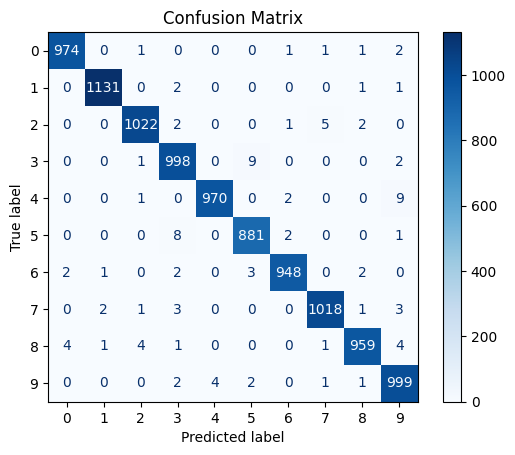

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(test_labels))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

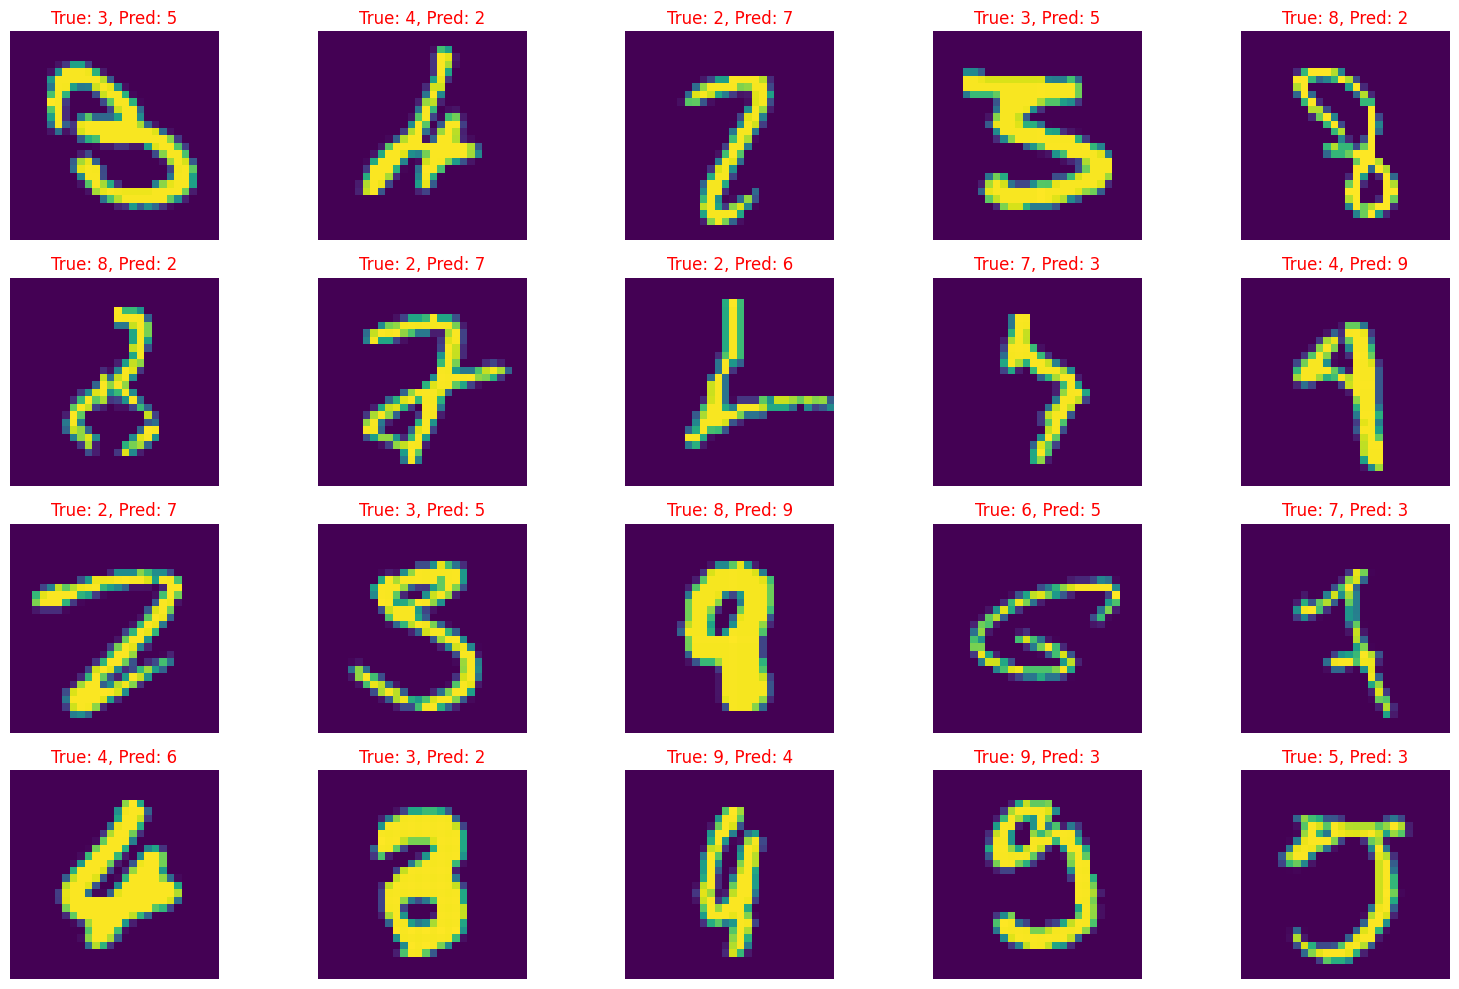

In [20]:
# Function to plot mistakes
def plot_mistakes(mistake_indexes, x_test, y_test, predicted_labels, num_images=10):
    """
    Visualize mistakes made by the model.
    Args:
        mistake_indexes (list): Indexes of mistakes.
        x_test (numpy array): Test images.
        y_test (numpy array): True labels.
        predicted_labels (numpy array): Predicted labels.
        num_images (int): Number of mistakes to visualize.
    """
    plt.figure(figsize=(16, 10))
    for i, idx in enumerate(mistake_indexes[:num_images]):
        plt.subplot(4, 5, i + 1)
        # Reshape image if needed (depending on dataset format)
        image = x_test[idx]
        plt.imshow(image)
        true_label = y_test[idx]
        pred_label = predicted_labels[idx]
        plt.title(f"True: {true_label}, Pred: {pred_label}", color='red')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
plot_mistakes(indexes_with_error, test_images, test_labels, test_prediction, num_images=20)